# Political Ideology and Politician Assessment Analysis

### Overview

In this project, I analyze how self-assessed ideology and demographics predict assessments of politicians' ideologies using data from the 2020 Cooperative Election Study (CES). The analysis focuses on survey questions from before the 2020 election.

###Step 1: Loading the CES Data


*   The CES2020_extract2.csv dataset is loaded, which includes questions about respondents' evaluations of various political figures' ideologies. The variable CC20_340a captures self-assessed ideology, with CC20_340a == 8 indicating respondents unsure of their ideology. Respondents with this answer are excluded from all analyses.


*   I created a plot to visualize the distribution of self-assessed ideology. The distribution shows that identifying as the middle of the political spectrum is the most popular response, while 'somewhat' columns are the least common responses.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io

uploaded = files.upload()

Saving CES2020_extract2.csv to CES2020_extract2.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['CES2020_extract2.csv']))
df

,caseid,commonweight,commonpostweight,vvweight,vvweight_post,birthyr,gender,educ,race,race_other,...,ideo5,votereg_post,inputstate_post,CC20_401,CC20_402a,CC20_402b,CC20_403,CC20_410,CL_2020gvm,CL_voter_status
0,1232318697,0.782510,0.665971,0.850917,0.606593,1966,1,4,1,__NA__,...,4.0,1.0,9.0,5.0,NaN,NaN,3.0,2.0,1.0,1.0
1,1231394915,1.344424,1.435594,NaN,NaN,1955,2,6,1,__NA__,...,1.0,2.0,12.0,NaN,17.0,NaN,NaN,NaN,NaN,2.0
2,1232451503,0.405520,0.342454,NaN,NaN,1946,2,5,1,__NA__,...,3.0,1.0,19.0,5.0,NaN,NaN,3.0,1.0,NaN,NaN
3,1232494791,0.957734,0.822106,1.041459,1.002495,1962,2,5,1,__NA__,...,3.0,1.0,25.0,5.0,NaN,NaN,3.0,1.0,5.0,1.0
4,1232494829,0.194665,0.161725,NaN,NaN,1967,1,5,1,__NA__,...,3.0,1.0,17.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60995,1199586597,1.790207,NaN,NaN,NaN,1978,1,2,1,__NA__,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60996,1261249927,1.163522,2.534721,1.265236,2.908672,1993,1,3,1,__NA__,...,1.0,1.0,41.0,5.0,NaN,NaN,3.0,1.0,3.0,1.0
60997,1261247715,1.576016,1.489458,1.713790,1.460657,1959,1,2,1,__NA__,...,3.0,1.0,19.0,5.0,NaN,NaN,1.0,2.0,4.0,1.0
60998,1257274335,1.007719,NaN,1.095813,NaN,1996,1,3,6,__NA__,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Count of self-assessed ideology')

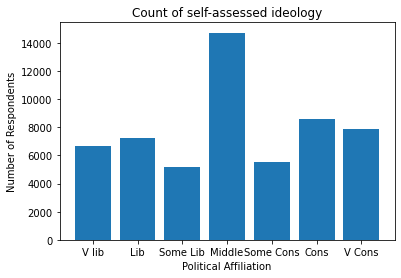

In [ ]:
df1 = df[df['CC20_340a'] != 8] #dropping respondents with unsure political ideology
df1.dropna(subset=['CC20_340a'], inplace=True) #drops null values

fig, ax = plt.subplots()
#Distribution of self-assessed ideology

weighted_ideo = df1.groupby('CC20_340a')['commonweight'].sum()
ax.bar(weighted_ideo.index, weighted_ideo.values)
new_x_ticks = ['V lib', 'Lib', 'Some Lib', 'Middle', 'Some Cons', 'Cons', 'V Cons']
ax.set_xticks(weighted_ideo.index)
ax.set_xticklabels(new_x_ticks)

# add labels and title
plt.xlabel('Political Affiliation')
plt.ylabel('Number of Respondents')
plt.title('Count of self-assessed ideology')


### Step 2: Analyzing Ideological Ratings of Joe Biden and Donald Trump

Variables CC20_340c and CC20_340d capture respondents’ ideological ratings of Joe Biden and Donald Trump, respectively. I created plots showing the distributions of these ratings.

Text(0.5, 1.0, 'Respondent’s Ideological Ratings of Joe Biden')

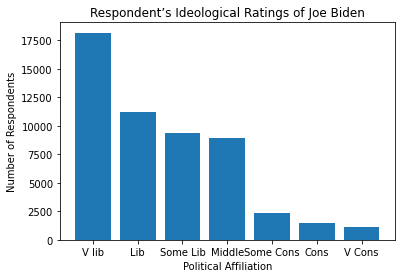

In [ ]:
#Joe Biden Distribution
df2 = df[df['CC20_340c'] != 8] #gets red of unsure ratings for Joe Biden
df2.dropna(subset=['CC20_340c'], inplace=True)

fig, ax = plt.subplots()
#Distribution of self-assessed ideology
joe_weighted = df2.groupby('CC20_340c')['commonweight'].sum()

ax.bar(joe_weighted.index, joe_weighted.values)
new_x_ticks = ['V lib', 'Lib', 'Some Lib', 'Middle', 'Some Cons', 'Cons', 'V Cons']
ax.set_xticks(joe_weighted.index)
ax.set_xticklabels(new_x_ticks)

# add labels and title
plt.xlabel('Political Affiliation')
plt.ylabel('Number of Respondents')
plt.title('Respondent’s Ideological Ratings of Joe Biden')

Text(0.5, 1.0, 'Respondent’s Ideological Ratings of Donald Trump')

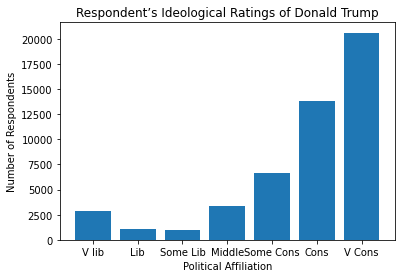

In [ ]:
#Donald Trump Distribution
df3 = df[df['CC20_340d'] != 8] #gets red of unsure ratings for Donald Trump
df3.dropna(subset=['CC20_340d'], inplace=True)

fig, ax = plt.subplots()
#Distribution of self-assessed ideology
trump_weighted = df3.groupby('CC20_340d')['commonweight'].sum()

ax.bar(trump_weighted.index, trump_weighted.values)
new_x_ticks = ['V lib', 'Lib', 'Some Lib', 'Middle', 'Some Cons', 'Cons', 'V Cons']
ax.set_xticks(trump_weighted.index)
ax.set_xticklabels(new_x_ticks)

# add labels and title
plt.xlabel('Political Affiliation')
plt.ylabel('Number of Respondents')
plt.title('Respondent’s Ideological Ratings of Donald Trump')

### Step 3: Predicting Ideological Rating of Joe Biden




*   To understand how a respondent’s personal ideology predicts their ideological rating of Joe Biden, I estimated a linear regression with the dependent variable being Biden's ideological rating and the independent variable being the self-assessed ideology. The regression is weighted by commonweight, and respondents unsure of their rating are excluded.


*   The results show that most people classify Biden as no more conservative than the middle of the political spectrum. The regression indicates that the more conservative an individual is, the more liberal they tend to perceive Biden.



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


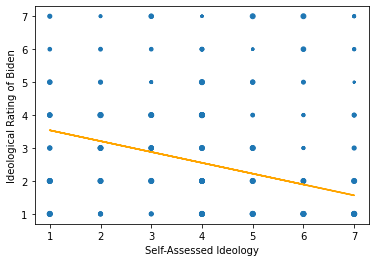

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

joe_regression = df[(df['CC20_340a'] != 8) & (df['CC20_340c'] != 8) & (df['CC20_340a'].isnull() == False) & (df['CC20_340c'].isnull() == False)]

x_var = 'CC20_340a'
y_var = 'CC20_340c'
weight_col = 'commonweight'

X = joe_regression[x_var]
X = sm.add_constant(X)
Y = joe_regression[y_var]
weights = joe_regression[weight_col]

wls_model = sm.WLS(Y, X, weights=weights)
results = wls_model.fit()

plt.scatter(joe_regression[x_var], joe_regression[y_var], s=joe_regression[weight_col]**1.2)

plt.plot(joe_regression[x_var], results.predict(sm.add_constant(joe_regression[x_var])), c='orange')
plt.xlabel('Self-Assessed Ideology')
plt.ylabel('Ideological Rating of Biden')
plt.show()

### Step 4: Predicting Ideological Rating of Donald Trump



*   Similarly, I analyzed how a respondent’s personal ideology predicts their ideological rating of Donald Trump by estimating a linear regression with Trump’s ideological rating as the dependent variable and self-assessed ideology as the independent variable. The analysis is also weighted by commonweight, excluding those unsure of their rating.


*   The results show that most people classify Trump’s ideology as 'somewhat conservative' to 'middle'. There is a clear trend where the more liberal an individual is, the more conservative they perceive Trump to be.




/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


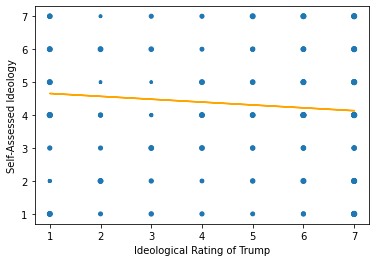

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

donald_regression = df[(df['CC20_340d'] != 8) & (df['CC20_340a'] != 8) & (df['CC20_340d'].isnull() == False) & (df['CC20_340a'].isnull() == False)]

x_var1 = 'CC20_340d'
y_var1 = 'CC20_340a'
weight_column = 'commonweight'

X = donald_regression[x_var1]
X = sm.add_constant(X)
Y = donald_regression[y_var1]
weights = donald_regression[weight_column]

wls_model = sm.WLS(Y, X, weights=weights)
results = wls_model.fit()

plt.scatter(donald_regression[x_var1], donald_regression[y_var1], s=donald_regression[weight_column]**1.2)

plt.plot(donald_regression[x_var1], results.predict(sm.add_constant(donald_regression[x_var1])), c='orange')
plt.xlabel('Ideological Rating of Trump')
plt.ylabel('Self-Assessed Ideology')
plt.show()

Just like the linear regression for Joe Biden, this regression's scale ranges from liberal to conservative, respectfully. This visualization shows that most people would classify Trump's ideology as 'some conservative' to 'middle'. Even though there isn't much variance in how people classify Trump's ideology, their still a trend between the more liberal an individual is, the more conservative they would consider Trump to be.

### Step 5: Comparison of Evaluations for Biden and Trump

I compared the intercepts and coefficients from the regressions for Biden and Trump. The results highlight that evaluations are quite opposite: conservatives tend to see Biden as more liberal, and liberals tend to see Trump as more conservative. There is more agreement among respondents on Trump’s political stance compared to Biden’s, with Biden’s ratings ranging from 'middle' to 'very liberal' and Trump’s from 'middle' to 'somewhat conservative'.

### Step 6: Evaluating Other Political Figures

For additional analysis, I selected one of the ratings from questions CC20_340e–CC20_340f. I visualized the relationship between self-assessed ideology and the rating of the chosen entity, estimating a linear regression similar to the previous analyses. The graph indicates how respondents rate the GOP's ideology based on their self-identified political status. Most people consider the GOP as conservative, with the intercept between 'conservative' and 'very conservative'. The trend shows that the more liberal a respondent is, the more conservative they consider the GOP to be.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


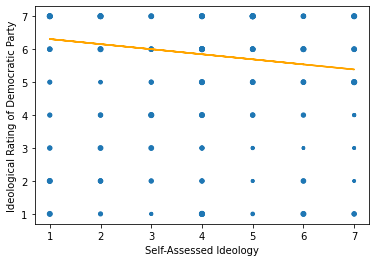

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

lin_reg = df[(df['CC20_340a'] != 8) & (df['CC20_340f'] != 8) & (df['CC20_340a'].isnull() == False) & (df['CC20_340f'].isnull() == False)]

x_variable = 'CC20_340a'
y_variable = 'CC20_340f'
weight_column = 'commonweight'

X = lin_reg[x_variable]
X = sm.add_constant(X)
Y = lin_reg[y_variable]
weights = lin_reg[weight_column]

wls_model = sm.WLS(Y, X, weights=weights)
results = wls_model.fit()

plt.scatter(lin_reg[x_variable], lin_reg[y_variable], s=lin_reg[weight_column]**1.2)

plt.plot(lin_reg[x_variable], results.predict(sm.add_constant(lin_reg[x_variable])), c='orange')
plt.xlabel('Self-Assessed Ideology')
plt.ylabel('Ideological Rating of Republican Party')
plt.show()

### Conclusion

This project demonstrates the significant impact of personal ideology on the perception of political figures' ideologies. The findings suggest that individuals tend to perceive opposing party figures as more extreme than they may actually be, and there is more consensus on Trump's ideological position than Biden’s. This analysis provides valuable insights into the polarized nature of political perceptions in the 2020 election.